In [1]:
# Importing the packages for further processes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the file by using pandas library
used_cars = pd.read_csv("C:\\Users\\nagas\\Desktop\\Used Cars.csv",encoding = "ISO-8859-1")

C:\Users\nagas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
used_cars#price, abtest, vehicleType, yearOfRegistration, gearbox, powerPs, model, kilometer, monthOfRegistration, fueltype, brand, notRepairedDamage, 

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,03-24-2016,0.0,70435.0,04-07-2016
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,03-24-2016,0.0,66954.0,04-07-2016
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,03-14-2016,0.0,90480.0,04-05-2016
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,03-17-2016,0.0,91074.0,03-17-2016
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,03-31-2016,0.0,60437.0,04-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371534,14-03-2016 17:48,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200.0,test,NaN,2005.0,NaN,0.0,NaN,20000,1.0,NaN,sonstige_autos,NaN,03-14-2016,0.0,39576.0,04-06-2016
371535,05-03-2016 19:56,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199.0,test,cabrio,2000.0,automatik,101.0,fortwo,125000,3.0,benzin,smart,nein,03-05-2016,0.0,26135.0,03-11-2016
371536,19-03-2016 18:57,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200.0,test,bus,1996.0,manuell,102.0,transporter,150000,3.0,diesel,volkswagen,nein,03-19-2016,0.0,87439.0,04-07-2016
371537,20-03-2016 19:41,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400.0,test,kombi,2002.0,manuell,100.0,golf,150000,6.0,diesel,volkswagen,NaN,03-20-2016,0.0,40764.0,03-24-2016


In [4]:
# Unnecessary columns -
#*dateCrawled, name, seller, offerType, dateCreated, *nrOfPictures, *postalCode, *lastSeen columns are removed

Pandas Profiling for the dataset cars_used :


In [5]:
#pip install pandas-profiling


In [6]:
#import pandas_profiling as pp

In [7]:
#pp.ProfileReport(used_cars)
# There are 4 numeric and 15 categorical datatypes
# powerPS is highly skewed and  have more no of zeros
# vehicleType has more no of missing values

Unnecessary columns are deleted from the dataset, the columns those deleted are dataCrawled, name, seller, offerType, dataCreated, nrOfPictures, postalCode and lastSeen.
These columns are unnecessary columns I identified to get good model.

In [8]:
cars_new = used_cars.iloc[:,4:16]

In [9]:
cars_new.dtypes

price                  float64
abtest                  object
vehicleType             object
yearOfRegistration     float64
gearbox                 object
powerPS                float64
model                   object
kilometer               object
monthOfRegistration    float64
fuelType                object
brand                   object
notRepairedDamage       object
dtype: object

In [10]:
# After removing unnecessary columns, dealing with missing values, outliers by replacing them with mode, lower and upper outlier values respectively
# yearOfRegistration
miss_y = cars_new.yearOfRegistration.isnull().sum()
print('no of missing value:',miss_y)
count_y = cars_new.yearOfRegistration.value_counts()
print('count:',count_y)
# replacing missing values with mode
mode_y = cars_new.yearOfRegistration.mode()
print('mode :',mode_y)


cars_new.yearOfRegistration.value_counts()
cars_new.yearOfRegistration.isnull().sum()
cars_new.yearOfRegistration.fillna(2000,inplace=True)
cars_new.yearOfRegistration.isnull().sum()

no of missing value: 2
count: 2000.0    24552
1999.0    22768
2005.0    22316
2006.0    20232
2001.0    20218
          ...  
6200.0        1
8200.0        1
5900.0        1
2900.0        1
4100.0        1
Name: yearOfRegistration, Length: 155, dtype: int64
mode : 0    2000.0
dtype: float64


0

In [11]:
cars_new.yearOfRegistration = pd.to_numeric(cars_new.yearOfRegistration,errors='coerce')


In [12]:
# removing the observations which have yearOfRegistration below 1945 and above 2017
cars_new = cars_new[
  (cars_new["yearOfRegistration"].between(1945,2017, inclusive=True))
]


In [13]:
# model
count_m = cars_new.model.value_counts()
missing_m = cars_new.model.isnull().sum()
print("count: ",count_m,'missing values: ',missing_m)
cars_new.model.fillna('blank',inplace=True)
# there is no need of replacing outliers
# labelling the variable using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cars_new['model']=le.fit_transform(cars_new['model'].astype('str'))

count:  golf               29653
andere             26168
3er                20416
polo               12903
corsa              12380
                   ...  
kalina                 6
serie_3                4
serie_1                2
discovery_sport        1
48429                  1
Name: model, Length: 252, dtype: int64 missing values:  19720


In [14]:
cars_new.model

0         120
1          53
2         121
3         120
4         105
         ... 
371534     53
371535    110
371536    227
371537    120
371538    150
Name: model, Length: 367135, dtype: int32

In [15]:
# brand
count_brand = cars_new.brand.value_counts()
missing_brand = cars_new.brand.isnull().sum()
print('count: ',count_brand,'missing values: ',missing_brand)
# replacing missingvalues with mode
cars_new.brand.fillna('blank',inplace=True)
cars_branddtype = cars_new.model.dtype
print("data type: ",cars_branddtype)
cars_new['brand']=le.fit_transform(cars_new['brand'].astype('str'))

count:  volkswagen        78548
bmw               39947
opel              39605
mercedes_benz     35012
audi              32626
ford              25249
renault           17647
peugeot           10909
fiat               9524
seat               6899
mazda              5628
skoda              5594
smart              5191
citroen            5123
nissan             4987
toyota             4657
sonstige_autos     3825
hyundai            3603
mini               3352
volvo              3309
mitsubishi         3033
honda              2797
kia                2527
alfa_romeo         2321
suzuki             2307
porsche            2205
chevrolet          1813
chrysler           1437
dacia               889
daihatsu            796
jeep                793
subaru              771
land_rover          766
jaguar              619
trabant             580
daewoo              537
saab                525
rover               485
lancia              478
lada                219
Name: brand, dtype: int64 missin

In [16]:
cars_new.brand.value_counts()

39    78548
3     39947
25    39605
21    35012
1     32626
11    25249
28    17647
26    10909
10     9524
31     6899
20     5628
32     5594
33     5191
6      5123
24     4987
37     4657
34     3825
13     3603
22     3352
40     3309
23     3033
12     2797
16     2527
0      2321
36     2307
27     2205
4      1813
5      1437
7       889
9       796
15      793
35      771
19      766
14      619
38      580
8       537
30      525
29      485
18      478
17      219
2         2
Name: brand, dtype: int64

In [17]:
cars_new

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480.0,test,NaN,1993.0,manuell,0.0,120,150000,0.0,benzin,39,NaN
1,18300.0,test,coupe,2011.0,manuell,190.0,53,125000,5.0,diesel,1,ja
2,9800.0,test,suv,2004.0,automatik,163.0,121,125000,8.0,diesel,15,NaN
3,1500.0,test,kleinwagen,2001.0,manuell,75.0,120,150000,6.0,benzin,39,nein
4,3600.0,test,kleinwagen,2008.0,manuell,69.0,105,90000,7.0,diesel,32,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371534,2200.0,test,NaN,2005.0,NaN,0.0,53,20000,1.0,NaN,34,NaN
371535,1199.0,test,cabrio,2000.0,automatik,101.0,110,125000,3.0,benzin,33,nein
371536,9200.0,test,bus,1996.0,manuell,102.0,227,150000,3.0,diesel,39,nein
371537,3400.0,test,kombi,2002.0,manuell,100.0,120,150000,6.0,diesel,39,NaN


In [18]:
cars_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367135 entries, 0 to 371538
Data columns (total 12 columns):
price                  367134 non-null float64
abtest                 367134 non-null object
vehicleType            333539 non-null object
yearOfRegistration     367135 non-null float64
gearbox                347671 non-null object
powerPS                367134 non-null float64
model                  367135 non-null int32
kilometer              367134 non-null object
monthOfRegistration    367133 non-null float64
fuelType               335567 non-null object
brand                  367135 non-null int32
notRepairedDamage      296975 non-null object
dtypes: float64(4), int32(2), object(6)
memory usage: 33.6+ MB


In [19]:
cars_new.describe()

,price,yearOfRegistration,powerPS,model,monthOfRegistration,brand
count,3.671340e+05,367135.000000,367134.000000,367135.000000,367133.000000,367135.000000
mean,1.732956e+04,2003.232797,115.879818,99.744732,5.748233,21.570161
std,3.609181e+06,7.420006,190.404921,71.179926,3.706706,13.510523
min,0.000000e+00,1945.000000,0.000000,0.000000,0.000000,0.000000
25%,1.150000e+03,1999.000000,70.000000,41.000000,3.000000,10.000000
50%,2.990000e+03,2003.000000,105.000000,86.000000,6.000000,24.000000
75%,7.250000e+03,2008.000000,150.000000,155.000000,9.000000,34.000000
max,2.147484e+09,2017.000000,20000.000000,252.000000,12.000000,40.000000


In [20]:
#pp.ProfileReport(cars_new)

In [21]:
# First deal with numeric datatype, replacing missing values, outliers  
# powerPS, monthOfRegistration
cars_new.powerPS

0           0.0
1         190.0
2         163.0
3          75.0
4          69.0
          ...  
371534      0.0
371535    101.0
371536    102.0
371537    100.0
371538    320.0
Name: powerPS, Length: 367135, dtype: float64

In [22]:
cars_new.powerPS.value_counts().sort_index()

0.0        39561
1.0           31
2.0           10
3.0            8
4.0           30
           ...  
17932.0        1
19208.0        1
19211.0        1
19312.0        1
20000.0        1
Name: powerPS, Length: 792, dtype: int64

In [23]:
# First dealing with missing values, replacing them with median 
cars_new.powerPS.isnull().sum()
cars_new.powerPS.fillna(115,inplace=True)
# Rough cleansing should be done to remove the values below 100 and above 500
cars_new = cars_new[
  (cars_new["powerPS"].between(50, 500, inclusive=True))
]


In [24]:
# Secondly dealing with outliers, replacing them with lower dendrum values and higher dendrum values.
# lower dendrum value is 0, may be replacing with 0 is not a good idea, may be replacing with lower quartile is good
# replacing with lower quartile and will check first
qpo1 = cars_new.powerPS.quantile(0.25)
qpo2 = cars_new.powerPS.quantile(0.75)
iqrpo = qpo2 -qpo1
print("inter qaurtile range : ",iqrpo)
lowerpo = qpo1 - (1.5*iqrpo)
upperpo = qpo2 + (1.5*iqrpo)
print("lower outlier value: ",lowerpo,',',"upper outlier value: ",',',upperpo)
cars_new.powerPS.loc[cars_new.powerPS < lowerpo] = lowerpo
cars_new.powerPS.loc[cars_new.powerPS > upperpo] = upperpo


inter qaurtile range :  68.0
lower outlier value:  -20.0 , upper outlier value:  , 252.0


C:\Users\nagas\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\nagas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\nagas\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [25]:
cars_new.powerPS.value_counts()

75.0     23678
60.0     15715
150.0    15326
140.0    13477
101.0    13169
         ...  
221.0        5
244.0        4
248.0        4
229.0        3
251.0        2
Name: powerPS, Length: 203, dtype: int64

In [26]:
cars_new.monthOfRegistration.value_counts().sort_index()

0.0     20764
1.0     21782
2.0     20292
3.0     32699
4.0     27873
5.0     27587
6.0     29830
7.0     25976
8.0     21318
9.0     22567
10.0    24616
11.0    22764
12.0    22782
Name: monthOfRegistration, dtype: int64

In [27]:
mor_na = cars_new.monthOfRegistration.isnull().sum()
print("number of missing values is",mor_na)
mor_mode = cars_new.monthOfRegistration.mode()
print(" Mode of mor is",mor_mode)
cars_new.monthOfRegistration.fillna(1,inplace=True)
# As the mode is 0, but i replace values with 3

cars_new.monthOfRegistration.value_counts()
cars_new

number of missing values is 1
 Mode of mor is 0    3.0
dtype: float64


C:\Users\nagas\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300.0,test,coupe,2011.0,manuell,190.0,53,125000,5.0,diesel,1,ja
2,9800.0,test,suv,2004.0,automatik,163.0,121,125000,8.0,diesel,15,NaN
3,1500.0,test,kleinwagen,2001.0,manuell,75.0,120,150000,6.0,benzin,39,nein
4,3600.0,test,kleinwagen,2008.0,manuell,69.0,105,90000,7.0,diesel,32,nein
5,650.0,test,limousine,1995.0,manuell,102.0,11,150000,10.0,benzin,3,ja
...,...,...,...,...,...,...,...,...,...,...,...,...
371531,3200.0,control,limousine,2004.0,manuell,225.0,144,150000,5.0,benzin,31,ja
371535,1199.0,test,cabrio,2000.0,automatik,101.0,110,125000,3.0,benzin,33,nein
371536,9200.0,test,bus,1996.0,manuell,102.0,227,150000,3.0,diesel,39,nein
371537,3400.0,test,kombi,2002.0,manuell,100.0,120,150000,6.0,diesel,39,NaN


In [28]:
# Next dealing with outliers, replacing with lower and upper values, but replacing with qauntiles due to negative values
qm1 = cars_new.monthOfRegistration.quantile(0.25)
qm2 = cars_new.monthOfRegistration.quantile(0.75)
print('qm1=',qm1,'qm2=',qm2)
# replacing outliers with lower and upper values
iqrm = qm2 - qm1
print('iqr :',iqrm)
lowerm = qm1 -(1.5*iqrm)
upperm = qm2 +(1.5*iqrm)
print("lower outlier value: ",lowerm,',',"upper outlier value: ",',',upperm)
cars_new.monthOfRegistration.loc[cars_new.monthOfRegistration < lowerm] = lowerm
cars_new.monthOfRegistration.loc[cars_new.monthOfRegistration > upperm] = upperm
# As there are only 12 months in a year but referred variable contains 13, so replacing 0 value with mode value
cars_new.monthOfRegistration.value_counts() # here after 0 the mode is 3


qm1= 3.0 qm2= 9.0
iqr : 6.0
lower outlier value:  -6.0 , upper outlier value:  , 18.0


C:\Users\nagas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\nagas\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


3.0     32699
6.0     29830
4.0     27873
5.0     27587
7.0     25976
10.0    24616
12.0    22782
11.0    22764
9.0     22567
1.0     21783
8.0     21318
0.0     20764
2.0     20292
Name: monthOfRegistration, dtype: int64

In [29]:
# After numerical, dealing with categorical
# abtest, vehicleType, yearOfRegistration, gearbox, kilometer, fueltype, notRepairedDamage
# abtest
# abtest is removed from the dataset as it increases the rmse value
'''
count_ab = cars_new.abtest.value_counts()
miss_ab = cars_new.abtest.isnull().sum()
print("sum of missing values:",miss_ab)
cars_new.abtest.fillna(value='blank',inplace=True)
# no outliers for this variable
count_ab
'''

del cars_new['abtest']


In [30]:
# vehicleType
count_v = cars_new.vehicleType.value_counts()
print(count_v)
miss_v = cars_new.vehicleType.isnull().sum()
print(miss_v)
# replacing missing values with its mode
mode_v = cars_new.vehicleType.mode()
print("mode is :",mode_v)
cars_new.vehicleType.fillna(value='blank',inplace = True)
# there is no need of replacing any outliers

limousine     88527
kleinwagen    67631
kombi         62614
bus           27817
cabrio        21283
coupe         17439
suv           13655
andere         2539
Name: vehicleType, dtype: int64
19346
mode is : 0    limousine
dtype: object


In [31]:
cars_new.yearOfRegistration.mode()

0    1999.0
dtype: float64

In [32]:
cars_new

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300.0,coupe,2011.0,manuell,190.0,53,125000,5.0,diesel,1,ja
2,9800.0,suv,2004.0,automatik,163.0,121,125000,8.0,diesel,15,NaN
3,1500.0,kleinwagen,2001.0,manuell,75.0,120,150000,6.0,benzin,39,nein
4,3600.0,kleinwagen,2008.0,manuell,69.0,105,90000,7.0,diesel,32,nein
5,650.0,limousine,1995.0,manuell,102.0,11,150000,10.0,benzin,3,ja
...,...,...,...,...,...,...,...,...,...,...,...
371531,3200.0,limousine,2004.0,manuell,225.0,144,150000,5.0,benzin,31,ja
371535,1199.0,cabrio,2000.0,automatik,101.0,110,125000,3.0,benzin,33,nein
371536,9200.0,bus,1996.0,manuell,102.0,227,150000,3.0,diesel,39,nein
371537,3400.0,kombi,2002.0,manuell,100.0,120,150000,6.0,diesel,39,NaN


In [33]:
#gearbox
count_g = cars_new.gearbox.value_counts()
print('count:',count_g)
miss_g = cars_new.gearbox.isnull().sum()
print('missing values:',miss_g)
#replacing missing values with mode if possible
mode_g = cars_new.gearbox.mode()
print("mode:",mode_g)
cars_new.gearbox.fillna(value='blank',inplace=True)
cars_new.gearbox[cars_new.gearbox == '25-03-2016 00:00'] = 'manuell'

count: manuell      244489
automatik     70420
Name: gearbox, dtype: int64
missing values: 5942
mode: 0    manuell
dtype: object


C:\Users\nagas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\nagas\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\nagas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
cars_new.kilometer.value_counts()

150000    188032
125000     30797
150000     18347
100000     12677
90000      10340
80000       9160
70000       8193
60000       7276
50000       6402
40000       5395
30000       4981
20000       4501
5000        3365
125000      3021
10000       1430
100000      1212
90000        960
80000        909
70000        747
60000        704
50000        571
40000        499
30000        465
20000        406
5000         317
10000        143
Name: kilometer, dtype: int64

In [35]:
#kilometer
cars_new.kilometer.fillna(150000,inplace=True)
cars_new['kilometer'] = cars_new['kilometer'].astype(np.int64)

miss_k = cars_new.kilometer.isnull().sum()
count_k = cars_new.kilometer.value_counts()
print("missingvalues:",miss_k,"count:",count_k)
qk1 = cars_new.kilometer.quantile(0.25)
qk2 = cars_new.kilometer.quantile(0.75)
print("quantiles:",'qk1:',qk1,'qk2:',qk2)
iqrk = qk2-qk1
print('iqrk =',iqrk)
lowerk = qk1 - (1.5*iqrk)
upperk = qk2 + (1.5*iqrk)
print("lower:",lowerk,'upperk:',upperk)
#replacing outliers 
cars_new.kilometer[cars_new.kilometer < lowerk] = lowerk
cars_new.kilometer[cars_new.kilometer > upperk] = upperk



C:\Users\nagas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nagas\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nagas\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

missingvalues: 0 count: 150000    206380
125000     33818
100000     13889
90000      11300
80000      10069
70000       8940
60000       7980
50000       6973
40000       5894
30000       5446
20000       4907
5000        3682
10000       1573
Name: kilometer, dtype: int64
quantiles: qk1: 100000.0 qk2: 150000.0
iqrk = 50000.0
lower: 25000.0 upperk: 225000.0


C:\Users\nagas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
#fuelType
missing_f = cars_new.fuelType.isnull().sum()
print('missing values:',missing_f)
# replacing missing values with mode
cars_new.fuelType.fillna(value='blank',inplace=True)
# replacing outliers


missing values: 19357


C:\Users\nagas\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [37]:
#notRepairedDamage
count_n = cars_new.notRepairedDamage.value_counts()
missing_n = cars_new.notRepairedDamage.isnull().sum()
print('count',count_n,'missing :',missing_n)
cars_new.notRepairedDamage.fillna(value='blank',inplace=True)

count nein    242858
ja       30418
Name: notRepairedDamage, dtype: int64 missing : 47575


In [38]:
# removing the observations which are less than 100 and more than 2,00,000
cars_new = cars_new[
    (cars_new["price"].between(100, 200000, inclusive=True))
]

# output variable price also have missing valuess

cars_new.price.isnull().sum()
cars_new.price.median()
cars_new.price.fillna(value='blank',inplace=True)

In [39]:
# conversion of float datatype to int
cars_new.powerPS = cars_new.powerPS.astype(int)
cars_new.monthOfRegistration = cars_new.monthOfRegistration.astype(int)
cars_new.price = pd.to_numeric(cars_new.price,errors ='coerce') 
#outlier replace may give less rmse value, replacing outliers in output varaible is not suggested
'''
# outlier replace
qpr1 = cars_new.price.quantile(0.25)
qpr2 = cars_new.price.quantile(0.75)
iqpr = qpr2 - qpr1
lower_pr = qpr1 - (1.5*iqpr)
higher_pr = qpr2 + (1.5*iqpr)
cars_new.price[cars_new.price < lower_pr] = lower_pr
cars_new.price[cars_new.price > higher_pr] = higher_pr
'''

C:\Users\nagas\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


'\n# outlier replace\nqpr1 = cars_new.price.quantile(0.25)\nqpr2 = cars_new.price.quantile(0.75)\niqpr = qpr2 - qpr1\nlower_pr = qpr1 - (1.5*iqpr)\nhigher_pr = qpr2 + (1.5*iqpr)\ncars_new.price[cars_new.price < lower_pr] = lower_pr\ncars_new.price[cars_new.price > higher_pr] = higher_pr\n'

In [40]:
cars_new.info()
X_drop = cars_new.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313105 entries, 1 to 371538
Data columns (total 11 columns):
price                  313105 non-null float64
vehicleType            313105 non-null object
yearOfRegistration     313105 non-null float64
gearbox                313105 non-null object
powerPS                313105 non-null int32
model                  313105 non-null int32
kilometer              313105 non-null int64
monthOfRegistration    313105 non-null int32
fuelType               313105 non-null object
brand                  313105 non-null int32
notRepairedDamage      313105 non-null object
dtypes: float64(2), int32(4), int64(1), object(4)
memory usage: 23.9+ MB


After dealing with missing values, labelling the categorical varaibles to get them fit into model, i.e,,
converting string variable to numerical variable and assigning them labels

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#cars_new['abtest']=le.fit_transform(cars_new['abtest'].astype('str'))
cars_new['vehicleType']=le.fit_transform(cars_new['vehicleType'].astype('str'))
cars_new['gearbox']=le.fit_transform(cars_new['gearbox'].astype('str'))
cars_new['fuelType']=le.fit_transform(cars_new['fuelType'].astype('str'))
cars_new['notRepairedDamage']=le.fit_transform(cars_new['notRepairedDamage'].astype('str'))


# converted object format to int type 
# given labeling by using label encoder

C:\Users\nagas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\nagas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\nagas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [42]:
cars_new.dtypes

price                  float64
vehicleType              int32
yearOfRegistration     float64
gearbox                  int32
powerPS                  int32
model                    int32
kilometer                int64
monthOfRegistration      int32
fuelType                 int32
brand                    int32
notRepairedDamage        int32
dtype: object

In [43]:
X_drop.dtypes

price                  float64
vehicleType             object
yearOfRegistration     float64
gearbox                 object
powerPS                  int32
model                    int32
kilometer                int64
monthOfRegistration      int32
fuelType                object
brand                    int32
notRepairedDamage       object
dtype: object

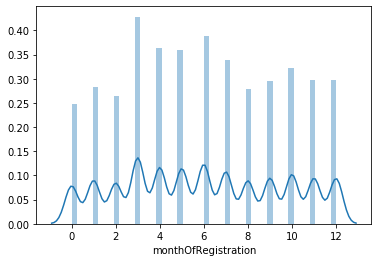

In [44]:
sns.distplot(X_drop.monthOfRegistration)
# More no of cars are registered in the months ranging 3-6

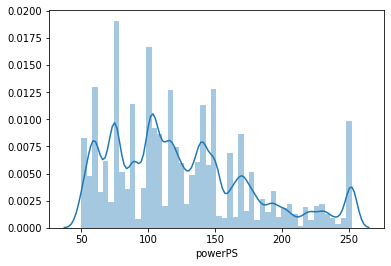

In [45]:
sns.distplot(X_drop.powerPS)

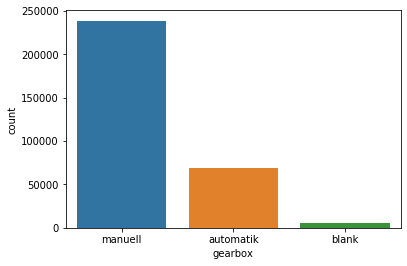

In [46]:
sns.countplot(X_drop.gearbox)
# Manuell geartype is very high when compared to automatik geartype

In [47]:
X_drop.dtypes
X_drop.kilometer = X_drop.kilometer.astype(float)

In [48]:
numerical_d = used_cars.select_dtypes(include='float64')
numerical_d

,price,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
0,480.0,1993.0,0.0,0.0,0.0,70435.0
1,18300.0,2011.0,190.0,5.0,0.0,66954.0
2,9800.0,2004.0,163.0,8.0,0.0,90480.0
3,1500.0,2001.0,75.0,6.0,0.0,91074.0
4,3600.0,2008.0,69.0,7.0,0.0,60437.0
...,...,...,...,...,...,...
371534,2200.0,2005.0,0.0,1.0,0.0,39576.0
371535,1199.0,2000.0,101.0,3.0,0.0,26135.0
371536,9200.0,1996.0,102.0,3.0,0.0,87439.0
371537,3400.0,2002.0,100.0,6.0,0.0,40764.0


In [49]:
categorical_d = used_cars.select_dtypes(include ='object')
categorical_d


,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,test,NaN,manuell,golf,150000,benzin,volkswagen,NaN,03-24-2016,04-07-2016
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,test,coupe,manuell,NaN,125000,diesel,audi,ja,03-24-2016,04-07-2016
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,test,suv,automatik,grand,125000,diesel,jeep,NaN,03-14-2016,04-05-2016
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,test,kleinwagen,manuell,golf,150000,benzin,volkswagen,nein,03-17-2016,03-17-2016
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,test,kleinwagen,manuell,fabia,90000,diesel,skoda,nein,03-31-2016,04-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371534,14-03-2016 17:48,Suche_t4___vito_ab_6_sitze,privat,Angebot,test,NaN,NaN,NaN,20000,NaN,sonstige_autos,NaN,03-14-2016,04-06-2016
371535,05-03-2016 19:56,Smart_smart_leistungssteigerung_100ps,privat,Angebot,test,cabrio,automatik,fortwo,125000,benzin,smart,nein,03-05-2016,03-11-2016
371536,19-03-2016 18:57,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,test,bus,manuell,transporter,150000,diesel,volkswagen,nein,03-19-2016,04-07-2016
371537,20-03-2016 19:41,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,test,kombi,manuell,golf,150000,diesel,volkswagen,NaN,03-20-2016,03-24-2016


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0AF1A6608>,
      dtype=object)

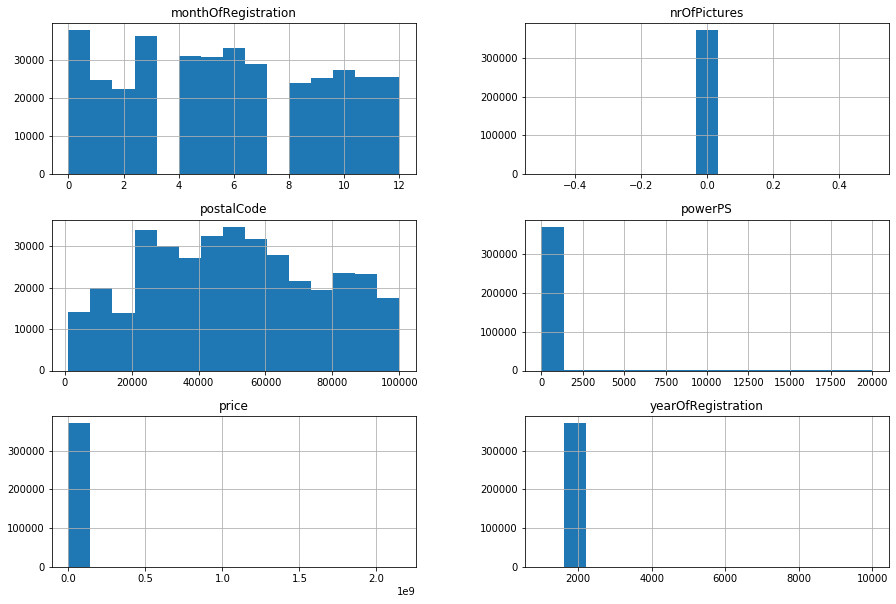

In [50]:
numerical_d.hist(bins=15,figsize=(15,10),layout=(3,2))
# More no of vehicles present are run for more than 140000 kms
# Most no of vehicles registered between 1995 and 2010

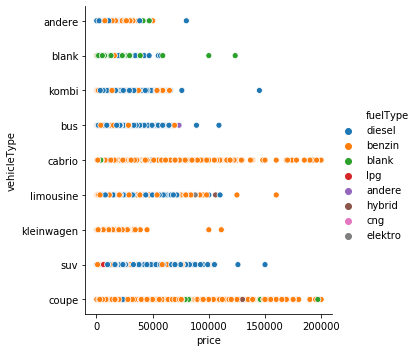

In [51]:
sns.relplot('price','vehicleType',hue='fuelType',data=X_drop)
# coupe and cabrio are the only vehicles present in prices above 150000 with fueltype benzene
# suv and bus  vehicles are mostly diesel type and valued less than 100000

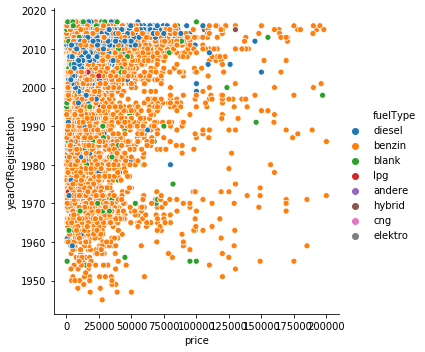

In [52]:
sns.relplot('price','yearOfRegistration',hue='fuelType',data = X_drop)
# Most no of vehicles of diesel vehicletype are registered between 2000 to 2020 and are of price less than 100000

In [53]:
used_cars

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,03-24-2016,0.0,70435.0,04-07-2016
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,03-24-2016,0.0,66954.0,04-07-2016
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,03-14-2016,0.0,90480.0,04-05-2016
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,03-17-2016,0.0,91074.0,03-17-2016
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,03-31-2016,0.0,60437.0,04-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371534,14-03-2016 17:48,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200.0,test,NaN,2005.0,NaN,0.0,NaN,20000,1.0,NaN,sonstige_autos,NaN,03-14-2016,0.0,39576.0,04-06-2016
371535,05-03-2016 19:56,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199.0,test,cabrio,2000.0,automatik,101.0,fortwo,125000,3.0,benzin,smart,nein,03-05-2016,0.0,26135.0,03-11-2016
371536,19-03-2016 18:57,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200.0,test,bus,1996.0,manuell,102.0,transporter,150000,3.0,diesel,volkswagen,nein,03-19-2016,0.0,87439.0,04-07-2016
371537,20-03-2016 19:41,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400.0,test,kombi,2002.0,manuell,100.0,golf,150000,6.0,diesel,volkswagen,NaN,03-20-2016,0.0,40764.0,03-24-2016


 No of days advertisement been on the site:

In [54]:
time_df = pd.DataFrame(dict(Start_date = used_cars.dateCreated, End_date =used_cars.lastSeen))
print(time_df)
time_df['Start_date'] = pd.to_datetime(time_df['Start_date'])
time_df['End_date'] = pd.to_datetime(time_df['End_date'])
time_df.dtypes

time_df['diff_hours'] = time_df['End_date'] - time_df['Start_date']
time_df['diff_hours']= time_df['diff_hours']/np.timedelta64(1,'h')
diff_days = (time_df.diff_hours/24)
diff_days
time_df['diff_days'] = diff_days
print(time_df)

        Start_date    End_date
0       03-24-2016  04-07-2016
1       03-24-2016  04-07-2016
2       03-14-2016  04-05-2016
3       03-17-2016  03-17-2016
4       03-31-2016  04-06-2016
...            ...         ...
371534  03-14-2016  04-06-2016
371535  03-05-2016  03-11-2016
371536  03-19-2016  04-07-2016
371537  03-20-2016  03-24-2016
371538  03-07-2016  03-22-2016

[371539 rows x 2 columns]
       Start_date   End_date  diff_hours  diff_days
0      2016-03-24 2016-04-07       336.0       14.0
1      2016-03-24 2016-04-07       336.0       14.0
2      2016-03-14 2016-04-05       528.0       22.0
3      2016-03-17 2016-03-17         0.0        0.0
4      2016-03-31 2016-04-06       144.0        6.0
...           ...        ...         ...        ...
371534 2016-03-14 2016-04-06       552.0       23.0
371535 2016-03-05 2016-03-11       144.0        6.0
371536 2016-03-19 2016-04-07       456.0       19.0
371537 2016-03-20 2016-03-24        96.0        4.0
371538 2016-03-07 2016-03-22 

In [55]:
print(diff_days)
print("average no of days ad been on the site: ", time_df['diff_days'].mean())# 12 days approximate

0         14.0
1         14.0
2         22.0
3          0.0
4          6.0
          ... 
371534    23.0
371535     6.0
371536    19.0
371537     4.0
371538    15.0
Name: diff_hours, Length: 371539, dtype: float64
average no of days ad been on the site:  8.814766766163263


Model Building :
1. Splitting data into train and test datasets
2. Fitting training datset into algorithm
3. Predicting the testing datset output
4. Comparing actual testing output values and predicted values
5. Getting root mean squared error(rmse), lesser the rmse value better the model
6. Getting r2_score , higher the value i.e,, when it tends towards 1, better the model

In [56]:
# Applying multiple linear regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [57]:
cars_new.columns

Index(['price', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')

In [58]:
X = cars_new.iloc[:,1:]
X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_n = scaler.fit_transform(X)
X_n
X_norm = pd.DataFrame(X_n,columns = X.columns)
X_norm

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,-0.589641,1.076151,0.553042,1.257991,-0.653198,-0.027936,-0.279403,1.277015,-1.490708,-0.863036
1,1.441460,0.052934,-1.853751,0.736776,0.293323,-0.027936,0.559183,1.277015,-0.462300,-2.248855
2,-0.081865,-0.385588,0.553042,-0.961997,0.279404,0.628682,0.000126,-0.724586,1.300687,0.522783
3,-0.081865,0.637629,0.553042,-1.077822,0.070612,-0.947200,0.279654,1.277015,0.786482,0.522783
4,0.933685,-1.262632,0.553042,-0.440782,-1.237814,0.628682,1.118240,-0.724586,-1.343793,-0.863036
...,...,...,...,...,...,...,...,...,...,...
313100,0.933685,0.052934,0.553042,1.933639,0.613470,0.628682,-0.279403,-0.724586,0.713025,-0.863036
313101,-1.097416,-0.531762,-1.853751,-0.460087,0.140209,-0.027936,-0.838460,-0.724586,0.859940,0.522783
313102,-1.605191,-1.116458,0.553042,-0.440782,1.768783,0.628682,-0.838460,1.277015,1.300687,0.522783
313103,0.425910,-0.239414,0.553042,-0.479391,0.279404,0.628682,0.000126,1.277015,1.300687,-2.248855


In [59]:
y = cars_new.iloc[:,0:1]
y

,price
1,18300.0
2,9800.0
3,1500.0
4,3600.0
5,650.0
...,...
371531,3200.0
371535,1199.0
371536,9200.0
371537,3400.0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.30)


In [61]:
from sklearn.linear_model import LinearRegression
slm = LinearRegression()
slm.fit(X_train,y_train)
y_pred = slm.predict(X_test)

In [62]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_rmse

5653.109333552619

In [63]:
cars_new.corr()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
price,1.000000,0.034967,0.347866,-0.293104,0.527344,-0.008338,-0.443345,0.045108,0.182772,-0.099750,0.187843
vehicleType,0.034967,1.000000,-0.160887,-0.108499,0.152281,-0.143589,0.008969,0.059868,0.042652,-0.122803,0.118512
yearOfRegistration,0.347866,-0.160887,1.000000,-0.078145,0.153299,0.064788,-0.344222,0.028173,0.229486,-0.025595,0.094951
gearbox,-0.293104,-0.108499,-0.078145,1.000000,-0.468438,0.042328,0.044533,-0.028595,-0.163804,0.121256,-0.042189
powerPS,0.527344,0.152281,0.153299,-0.468438,1.000000,-0.145816,-0.008138,0.043841,0.228246,-0.331696,0.107741
model,-0.008338,-0.143589,0.064788,0.042328,-0.145816,1.000000,-0.031622,0.005095,0.042182,0.469130,0.004306
kilometer,-0.443345,0.008969,-0.344222,0.044533,-0.008138,-0.031622,1.000000,-0.021711,0.116546,-0.026031,-0.127023
monthOfRegistration,0.045108,0.059868,0.028173,-0.028595,0.043841,0.005095,-0.021711,1.000000,0.050841,-0.013229,0.110294
fuelType,0.182772,0.042652,0.229486,-0.163804,0.228246,0.042182,0.116546,0.050841,1.000000,-0.050985,0.041426
brand,-0.099750,-0.122803,-0.025595,0.121256,-0.331696,0.469130,-0.026031,-0.013229,-0.050985,1.000000,-0.021138


In [64]:
from sklearn.metrics import r2_score

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)
LinearRegression()
pred_test_lr= lr.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test,pred_test_lr))
r2_score_linear = r2_score(y_test, pred_test_lr)
print('rmse_linear:',rmse_linear)
print('r2_score_linear:',r2_score_linear)

rmse_linear: 5653.109333552619
r2_score_linear: 0.5151857466696466


In [66]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_test_rr= rr.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test,pred_test_rr))
r2_score_ridge = r2_score(y_test, pred_test_rr)
print('rmse_ridge:',rmse_ridge)
print('r2_score_ridge',r2_score_ridge)

rmse_ridge: 5653.109331262987
r2_score_ridge 0.5151857470623673


In [67]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_test_lasso= model_lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test,pred_test_lasso))
r2_score_lasso = r2_score(y_test, pred_test_lasso)
print('rmse_lasso: ',rmse_lasso )
print('r2_score_lasso: ',r2_score_lasso )

rmse_lasso:  5653.109276456706
r2_score_lasso:  0.5151857564628104


In [68]:
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_test_enet= model_enet.predict(X_test)
rmse_elasticnet = np.sqrt(mean_squared_error(y_test,pred_test_enet))
r2_score_elasticnet = r2_score(y_test, pred_test_enet)
print('rmse_elasticnet: ',rmse_elasticnet )
print('r2_score_elasticnet: ',r2_score_elasticnet )



rmse_elasticnet:  5652.942863833579
r2_score_elasticnet:  0.5152142993472866


In [69]:
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor(random_state=42,n_estimators=100)
model_random.fit(X_train,y_train)
pred_test_random= model_random.predict(X_test)
rmse_random = np.sqrt(mean_squared_error(y_test,pred_test_random))
r2_score_random = r2_score(y_test, pred_test_random)
print('rmse_random: ',rmse_random)
print('r2_score_random:',r2_score_random)


C:\Users\nagas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


rmse_random:  3192.654218456466
r2_score_random: 0.8453662176821031


In [70]:
from sklearn.tree import DecisionTreeRegressor   
decision_regressor = DecisionTreeRegressor(random_state = 42)  
decision_regressor.fit(X_train,y_train)
pred_test_decision = decision_regressor.predict(X_test)
rmse_decision = np.sqrt(mean_squared_error(y_test,pred_test_decision))
r2_score_decision = r2_score(y_test,pred_test_decision)
print('rmse_decision: ',rmse_decision)
print('r2_score_decision: ',r2_score_decision)


rmse_decision:  4164.236835629302
r2_score_decision:  0.7369299226950997


In [71]:
cars_1 = used_cars.copy()
cars_1

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,03-24-2016,0.0,70435.0,04-07-2016
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,03-24-2016,0.0,66954.0,04-07-2016
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,03-14-2016,0.0,90480.0,04-05-2016
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,03-17-2016,0.0,91074.0,03-17-2016
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,03-31-2016,0.0,60437.0,04-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371534,14-03-2016 17:48,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200.0,test,NaN,2005.0,NaN,0.0,NaN,20000,1.0,NaN,sonstige_autos,NaN,03-14-2016,0.0,39576.0,04-06-2016
371535,05-03-2016 19:56,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199.0,test,cabrio,2000.0,automatik,101.0,fortwo,125000,3.0,benzin,smart,nein,03-05-2016,0.0,26135.0,03-11-2016
371536,19-03-2016 18:57,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200.0,test,bus,1996.0,manuell,102.0,transporter,150000,3.0,diesel,volkswagen,nein,03-19-2016,0.0,87439.0,04-07-2016
371537,20-03-2016 19:41,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400.0,test,kombi,2002.0,manuell,100.0,golf,150000,6.0,diesel,volkswagen,NaN,03-20-2016,0.0,40764.0,03-24-2016


grouping all the obseravtions by uisng vehicleType and fuelType.

In [72]:
cars_1.groupby(['vehicleType'],sort=False).sum()


,price,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
vehicleType,,,,,,
coupe,4.936843e+08,38041998.0,3289453.0,111701.0,0.0,1.026824e+09
suv,1.947722e+08,29495823.0,2441569.0,91709.0,0.0,7.709658e+08
kleinwagen,4.556837e+08,160237809.0,5502699.0,463253.0,0.0,4.003489e+09
limousine,1.065984e+09,191971911.0,12685296.0,577625.0,0.0,4.939916e+09
cabrio,3.452164e+08,45833535.0,3324382.0,126694.0,0.0,1.238022e+09
bus,3.111562e+08,60530266.0,3430232.0,185968.0,0.0,1.521211e+09
kombi,5.230276e+08,135372466.0,9216207.0,410265.0,0.0,3.408869e+09
andere,2.273793e+09,6709575.0,342826.0,17790.0,0.0,1.538077e+08
volkswagen,4.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00


In [73]:
daf = cars_1.groupby(['vehicleType','fuelType'])

In [74]:
daf.first()

dateCrawled  \
vehicleType fuelType                     
andere      andere    22-03-2016 13:51   
            benzin    03-04-2016 11:44   
            cng       22-03-2016 19:36   
            diesel    01-04-2016 17:45   
            elektro   08-03-2016 17:56   
            hybrid    25-03-2016 22:55   
            lpg       09-03-2016 18:37   
bus         andere    12-03-2016 16:57   
            benzin    04-04-2016 23:42   
            cng       27-03-2016 14:37   
            diesel    23-03-2016 15:48   
            elektro   30-03-2016 13:57   
            hybrid    26-03-2016 20:57   
            lpg       11-03-2016 18:55   
cabrio      andere    15-03-2016 18:53   
            benzin    01-04-2016 20:48   
            cng       22-03-2016 07:25   
            diesel    21-03-2016 12:56   
            elektro   14-03-2016 11:53   
            lpg       21-03-2016 13:43   
coupe       andere    26-03-2016 15:42   
            benzin    01-04-2016 19:56   
            cng       24-03-2016 16:57   
            diesel    24-03-2016 10:58   
            elektro   25-03-2016 18:49   
            hybrid    27-03-2016 16:42   
            lpg       13-03-2016 00:57   
kleinwagen  andere    02-04-2016 13:47   
            benzin    17-03-2016 16:54   
            cng       21-03-2016 22:54   
            diesel    31-03-2016 17:25   
            elektro   26-03-2016 12:55   
            hybrid    20-03-2016 15:30   
            lpg       25-03-2016 10:52   
kombi       andere    23-03-2016 18:36   
            benzin    15-03-2016 22:49   
            cng       26-03-2016 13:37   
            diesel    07-04-2016 10:06   
            elektro   08-03-2016 17:56   
            hybrid    22-03-2016 21:37   
            lpg       10-03-2016 09:56   
limousine   andere    14-03-2016 23:52   
            benzin    04-04-2016 17:36   
            cng       17-03-2016 22:51   
            diesel    03-04-2016 15:48   
            elektro   30-03-2016 08:57   
            hybrid    26-03-2016 12:58   
            lpg       16-03-2016 19:49   
suv         andere    10-03-2016 11:55   
            benzin    21-03-2016 12:47   
            cng       01-04-2016 19:53   
            diesel    14-03-2016 12:52   
            elektro   07-03-2016 23:57   
            hybrid    01-04-2016 23:37   
            lpg       31-03-2016 21:59   

                                                                   name  \
vehicleType fuelType                                                      
andere      andere    Citroen_Berlingo_Chrono_Multispace_Raum_/_Spar...   
            benzin                                      Golf_1_6_Family   
            cng                                    Fiat_Multipla_Erdgas   
            diesel    Abschleppwagen_Vw_LT_195.000_gruene_Plakette_T...   
            elektro                                 Elektroauto_City_EL   
            hybrid            Toyota_Prius_Life___Hybrid_Benzin/Elektro   
            lpg       Honda_Civic_1.6_Automatik_mit_Prins_LPG_Autoga...   
bus         andere    VW_T5_DoKa__Ruecksitzbank___Beifahrerdoppelsit...   
            benzin                 Ford_C___Max_Titanium_1_0_L_EcoBoost   
            cng                       Opel_Zafira_1.6_CNG_Turbo_Edition   
            diesel                     Ford_C_MAX_2.0_TDCi_DPF_Titanium   
            elektro            Renault_Kangoo_Maxi_Z.E.__ohne_Batterie_   
            hybrid    Hustender_VW_T4_Bus_Multivan_Bulli_mit_Aufstel...   
            lpg                  Opel_meriva_1.6_16_v_lpg__z16xe_no_OPC   
cabrio      andere                      Karmann_Ghia_cabrio__by_Rudolph   
            benzin                          Peugeot_206_CC_110_Platinum   
            cng                    Golf_3_capriolet_highline_voll_Leder   
            diesel          Audi_A5_Cabrio_3.0_TDI_DPF_quattro_S_tronic   
            elektro   Smart_smart_fortwo_cabrio_electric_drive__ohne...   
            lpg                          BMW_325_Ci_m__pa

In [75]:
imp_var = pd.DataFrame(decision_regressor.feature_importances_,[X.columns])
imp_var

,0
vehicleType,0.047867
yearOfRegistration,0.354136
gearbox,0.009971
powerPS,0.295527
model,0.074394
kilometer,0.109846
monthOfRegistration,0.035260
fuelType,0.012791
brand,0.051870
notRepairedDamage,0.008338


In [76]:
print('The rmse value of Linear Regression :  ',        rmse_linear)
print('The rmse value of Lasso Regression :  ',         rmse_lasso)
print('The rmse value of Ridge Regression:  ',          rmse_ridge)
print('The rmse value of Elastinet Regression :  ',     rmse_elasticnet)
print('The rmse value of Decision Tree Regression :  ', rmse_decision)
print('The rmse value of Random Forest Regression :  ', rmse_random)

The rmse value of Linear Regression :   5653.109333552619
The rmse value of Lasso Regression :   5653.109276456706
The rmse value of Ridge Regression:   5653.109331262987
The rmse value of Elastinet Regression :   5652.942863833579
The rmse value of Decision Tree Regression :   4164.236835629302
The rmse value of Random Forest Regression :   3192.654218456466


In [77]:
print('The r2_score value of Linear Regression :  ',  r2_score_linear)
print('The r2_score value of Lasso Regression :  ',   r2_score_lasso)
print('The r2_score of Ridge Regression:  ',          r2_score_ridge)
print('The r2_score of Elastinet Regression :  ',     r2_score_elasticnet)
print('The r2_score of Decision Tree Regression :  ', r2_score_decision)
print('The r2_score of Random Forest Regression :  ', r2_score_random)

The r2_score value of Linear Regression :   0.5151857466696466
The r2_score value of Lasso Regression :   0.5151857564628104
The r2_score of Ridge Regression:   0.5151857470623673
The r2_score of Elastinet Regression :   0.5152142993472866
The r2_score of Decision Tree Regression :   0.7369299226950997
The r2_score of Random Forest Regression :   0.8453662176821031


By using all the algorithms, Random Forest is best fit for this model. Random Forest got the lesser rmse value and higher r2_score.

So Random Forest model can be used for future predictions.

According to Random Forest, the features that have given more importance are yearOfRegistration, powerPS and kilometer.
By rechecking this features rmse value may be decreased for a fewer value.

In [78]:
'''
#By replacing the ouliers in output
rmse values are like this

The rmse value of Linear Regression :   3075.300093344899
The rmse value of Lasso Regression :   3075.3001705132097
The rmse value of Ridge Regression:   3075.300092000035
The rmse value of Elastinet Regression :   3075.215366155245
The rmse value of Decision Tree Regression :   2055.8594935065275
The rmse value of Random Forest Regression :   1597.671817662537

r2_square values are like this

The r2_score value of Linear Regression :   0.6536285739798497
The r2_score value of Lasso Regression :   0.6536285565968969
The r2_score of Ridge Regression:   0.6536285742827941
The r2_score of Elastinet Regression :   0.6536476593844238
The r2_score of Decision Tree Regression :   0.8452060743681286
The r2_score of Random Forest Regression :   0.9065149415929749
'''

'\n#By replacing the ouliers in output\nrmse values are like this\n\nThe rmse value of Linear Regression :   3075.300093344899\nThe rmse value of Lasso Regression :   3075.3001705132097\nThe rmse value of Ridge Regression:   3075.300092000035\nThe rmse value of Elastinet Regression :   3075.215366155245\nThe rmse value of Decision Tree Regression :   2055.8594935065275\nThe rmse value of Random Forest Regression :   1597.671817662537\n\nr2_square values are like this\n\nThe r2_score value of Linear Regression :   0.6536285739798497\nThe r2_score value of Lasso Regression :   0.6536285565968969\nThe r2_score of Ridge Regression:   0.6536285742827941\nThe r2_score of Elastinet Regression :   0.6536476593844238\nThe r2_score of Decision Tree Regression :   0.8452060743681286\nThe r2_score of Random Forest Regression :   0.9065149415929749\n'